In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your clean, filtered dataset
# (We use the CSV you just saved, so it's instant)
df = pd.read_csv("ebs_commute_data.csv")

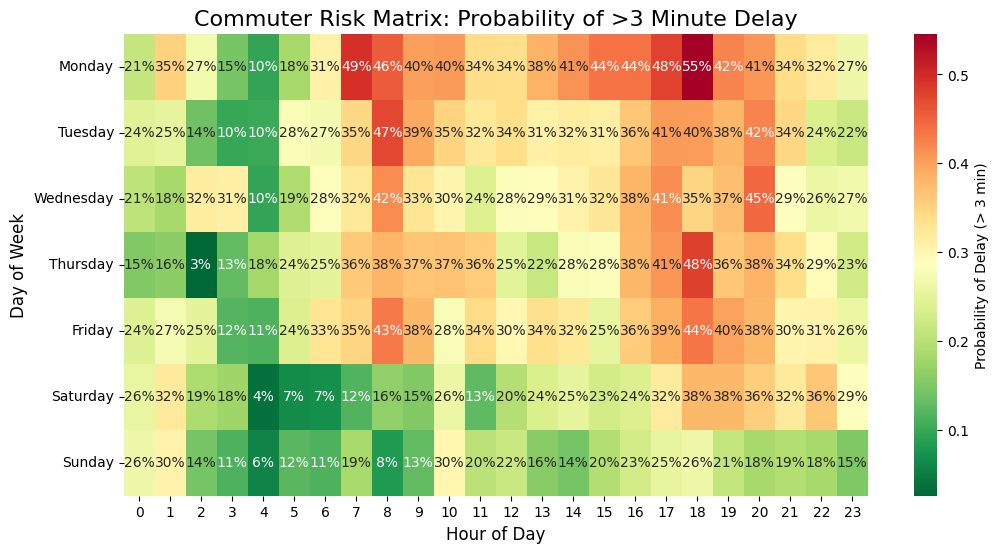

In [3]:
# 2. Delay definition: > 3 minutes
df['is_delayed'] = (df['delay_in_min'] > 3).astype(int)

# 3. Create the Pivot Table
heatmap_data = df.pivot_table(
    index='weekday', 
    columns='hour', 
    values='is_delayed', 
    aggfunc='mean'
)

# Sort days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# 4. Plot the updated Heatmap
plt.figure(figsize=(12, 6))

sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".0%", 
    cmap="RdYlGn_r", 
    cbar_kws={'label': 'Probability of Delay (> 3 min)'} # Updated Label
)

plt.title("Commuter Risk Matrix: Probability of >3 Minute Delay", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.yticks(rotation=0)

plt.show()